# Setup

In [1]:
# import libraries
from pandas import Series, DataFrame
import numpy as np
import pandas as pd
from datetime import datetime
import calendar
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from matplotlib import pyplot
from matplotlib.pyplot import *
import io
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

%matplotlib inline

In [2]:
# load the csv file
df = pd.read_csv('df_oct.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [4]:
len(df)

42448764

In [460]:
# take a subset of users
import random
users = df['user_id'].to_list()
n = int(len(df)*0.0007)
sampled_users = random.sample(users, n)
df_sub = df[df['user_id'].isin(sampled_users)]
df_sub.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
58,2019-10-01 00:00:44 UTC,view,26500313,2053013563550729061,NaN,lucente,267.19,525856698,f72ea16b-4ec3-44f8-8fcd-35d89984b744
60,2019-10-01 00:00:46 UTC,view,4100126,2053013561218695907,NaN,sony,326.62,519885473,b70cb218-db90-4011-b582-0bd237109df1
80,2019-10-01 00:01:07 UTC,view,27700113,2053013560086233771,construction.tools.pump,leo,48.90,515630204,f9cc0313-5572-4894-a4eb-45d855f064cc
83,2019-10-01 00:01:10 UTC,view,4100126,2053013561218695907,NaN,sony,326.62,519885473,b70cb218-db90-4011-b582-0bd237109df1
85,2019-10-01 00:01:12 UTC,view,26500144,2053013563550729061,NaN,lucente,259.21,525856698,f72ea16b-4ec3-44f8-8fcd-35d89984b744


In [461]:
len(df_sub)

2399812

In [462]:
df_sub.to_csv('df_sub.csv',index=False)

# EDA

yellow: #f9be15  
red: 	#e73e4e  
blue: #368aca  
navy: #1a1f3a

In [3]:
import copy
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
df_eda = pd.read_csv('df_eda.csv')

In [4]:
df_eda['event_time'] = pd.to_datetime(df_eda['event_time'])
df_eda['main_category'] = df_eda['category_code'].str.split(".",n=2,expand=True)[0]
df_eda['second_category'] = df_eda['category_code'].str.split(".",n=2,expand=True)[1]
df_eda['third_category'] = df_eda['category_code'].str.split(".",n=2,expand=True)[2]
df_eda.index = df_eda['event_time']

In [99]:
df_eda['view'] = df_eda['event_type'].apply(lambda x: 1 if x == 'view' else 0)
df_eda['cart'] = df_eda['event_type'].apply(lambda x: 1 if x == 'cart' else 0)
df_eda['purchase'] = df_eda['event_type'].apply(lambda x: 1 if x == 'purchase' else 0)

In [101]:
df_eda['date']=df_eda['event_time'].dt.day
df_eda['weekday']=df_eda['event_time'].dt.weekday
df_eda['hours']=df_eda['event_time'].dt.hour
df_eda['weekday_name'] = df_eda['event_time'].apply(lambda x: x.strftime("%A"))

In [248]:
df_eda.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category,second_category,third_category,view,cart,purchase,date,weekday,hours,weekday_name
event_time,,,,,,,,,,,,,,,,,,,
2019-10-01 00:00:00+00:00,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,NaN,NaN,NaN,1,0,0,1,1,0,Tuesday
2019-10-01 00:00:15+00:00,2019-10-01 00:00:15+00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,NaN,NaN,NaN,1,0,0,1,1,0,Tuesday
2019-10-01 00:01:00+00:00,2019-10-01 00:01:00+00:00,view,4300262,2053013552385491165,NaN,vitek,72.00,523239174,464a96b0-03ee-420d-92fb-643469379b89,NaN,NaN,NaN,1,0,0,1,1,0,Tuesday


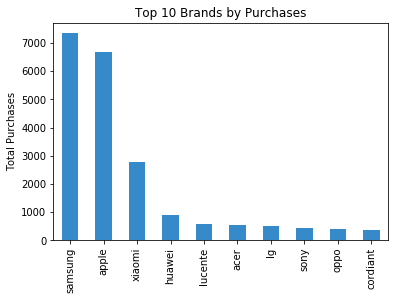

In [339]:
df_purch = df_eda[df_eda['event_type'] == 'purchase']
df_purch['brand'].value_counts()[:10].plot(kind='bar',color='#368aca')
plt.ylabel('Total Purchases')
plt.title('Top 10 Brands by Purchases')
plt.show()

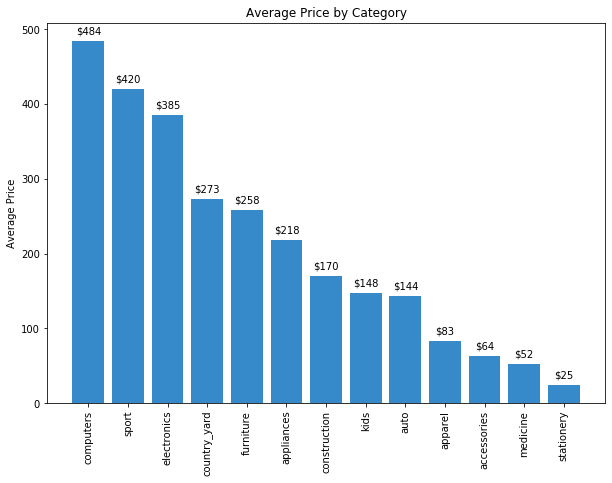

In [372]:
fig, ax = plt.subplots(figsize=(10,7))
plot(ax=ax)
by_brand = df_eda.groupby(['main_category']).agg({'price':'mean'})
by_brand.reset_index(level=0, inplace=True)
by_brand.sort_values("price",ascending=False,inplace=True)
plt.bar(by_brand['main_category'],by_brand['price'],color='#368aca')
plt.xticks(rotation=90)

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "${:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.ylabel('Average Price')
plt.title('Average Price by Category')
plt.show()

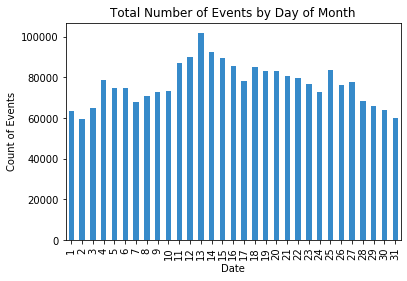

In [289]:
plt.figure()
df_eda.groupby(df_eda['event_time'].dt.day)['event_time'].count().plot(kind="bar",
                                                               title="Total Number of Events by Day of Month",
                                                               color=('#368aca'))
                                                                   
plt.xlabel('Date')
plt.ylabel('Count of Events')
plt.show()

In [294]:
by_hour = df_eda.groupby(['hours']).agg({'view':'sum','cart':'sum','purchase':'sum'})
by_hour.reset_index(level=0, inplace=True)

by_hour['avg_view'] = by_hour['view']/31
by_hour['avg_cart'] = by_hour['cart']/31
by_hour['avg_purch'] = by_hour['purchase']/31

by_hour.head()

,hours,view,cart,purchase,avg_view,avg_cart,avg_purch
0,0,17636,207,170,568.903226,6.677419,5.483871
1,1,30372,380,318,979.741935,12.258065,10.258065
2,2,58501,907,722,1887.129032,29.258065,23.290323
3,3,81844,1695,1613,2640.129032,54.677419,52.032258
4,4,97819,2318,2140,3155.451613,74.774194,69.032258


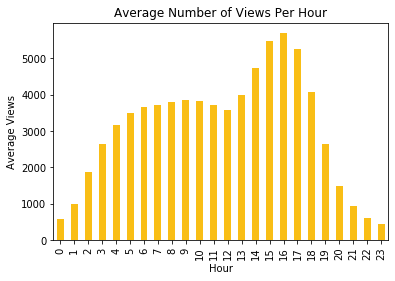

In [318]:
by_hour['avg_view'].plot.bar(color='#f9be15')
plt.xlabel('Hour')
plt.ylabel('Average Views')
plt.title('Average Number of Views Per Hour')
plt.show()

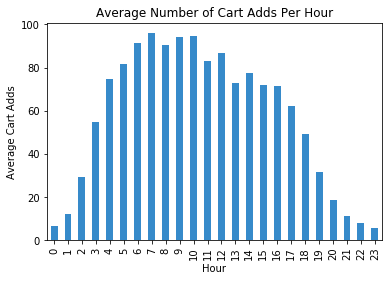

In [320]:
by_hour['avg_cart'].plot.bar(color='#368aca')
plt.xlabel('Hour')
plt.ylabel('Average Cart Adds')
plt.title('Average Number of Cart Adds Per Hour')
plt.show()

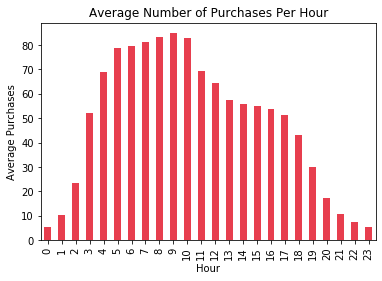

In [321]:
by_hour['avg_purch'].plot.bar(color='#e73e4e')
plt.xlabel('Hour')
plt.ylabel('Average Purchases')
plt.title('Average Number of Purchases Per Hour')
plt.show()

In [135]:
by_day = df_eda.groupby(['date']).agg({'view':'sum','cart':'sum','purchase':'sum'})
by_day.reset_index(level=0, inplace=True)
by_day.head()

,date,view,cart,purchase
0,1,62172,575,769
1,2,57822,787,891
2,3,63271,903,851
3,4,75097,2129,1224
4,5,71909,1748,1148


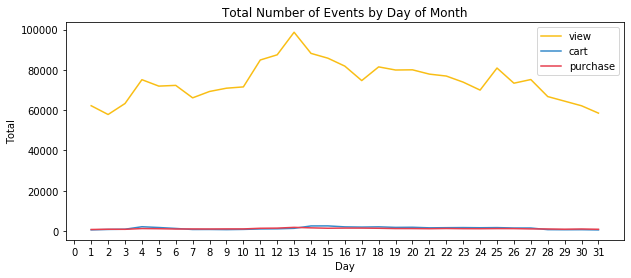

In [325]:
fig, ax = plt.subplots(figsize=(10,4))
plot(ax=ax)

plot(by_day['date'], by_day['view'], marker='None', linestyle='-', label='view', color='#f9be15')
plot(by_day['date'], by_day['cart'], marker='None', linestyle='-', label='cart', color ='#368aca')
plot(by_day['date'], by_day['purchase'], marker='None', linestyle='-', label='purchase', color='#e73e4e')

xlabel('Day')
ylabel('Total')
title('Total Number of Events by Day of Month')
legend(loc='best')
plt.xticks(np.arange(0, 32, 1.0))
show()

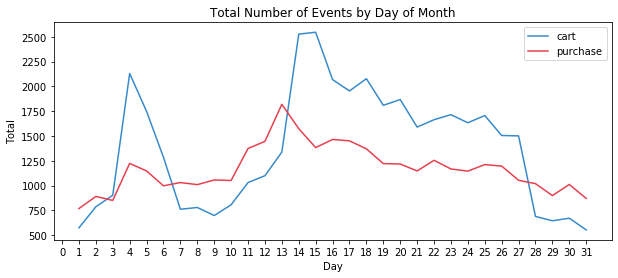

In [327]:
fig, ax = plt.subplots(figsize=(10,4))
plot(ax=ax)

plot(by_day['date'], by_day['cart'], marker='None', linestyle='-', label='cart',color ='#368aca')
plot(by_day['date'], by_day['purchase'], marker='None', linestyle='-', label='purchase',color='#e73e4e')

xlabel('Day')
ylabel('Total')
title('Total Number of Events by Day of Month')
legend(loc='best')
plt.xticks(np.arange(0, 32, 1.0))

show()

In [284]:
by_weekday = df_eda.groupby(['weekday_name']).agg({'view':'sum','cart':'sum','purchase':'sum'})
by_weekday.reset_index(level=0, inplace=True)

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
by_weekday['weekday_name'] = pd.Categorical(by_weekday['weekday_name'], categories=cats, ordered=True)
by_weekday = by_weekday.sort_values('weekday_name')
by_weekday = by_weekday.set_index('weekday_name').reindex(cats).reset_index()

weekdaynums = {'Monday':4,'Tuesday':5,'Wednesday':5,'Thursday':5,'Friday':4,'Saturday':4,'Sunday':4}
by_weekday['num_days'] = by_weekday['weekday_name'].map(weekdaynums)

by_weekday['view_real'] = by_weekday['view']/by_weekday['num_days']
by_weekday['cart_real'] = by_weekday['cart']/by_weekday['num_days']
by_weekday['purch_real'] = by_weekday['purchase']/by_weekday['num_days']

by_weekday

,weekday_name,view,cart,purchase,num_days,view_real,cart_real,purch_real
0,Monday,298822,5568,4773,4,74705.50,1392.00,1193.25
1,Tuesday,358533,6210,5317,5,71706.60,1242.00,1063.40
2,Wednesday,346553,5941,5593,5,69310.60,1188.20,1118.60
3,Thursday,337873,5851,5371,5,67574.60,1170.20,1074.20
4,Friday,322291,6943,5181,4,80572.75,1735.75,1295.25
5,Saturday,312606,6162,5013,4,78151.50,1540.50,1253.25
6,Sunday,326075,5991,5089,4,81518.75,1497.75,1272.25


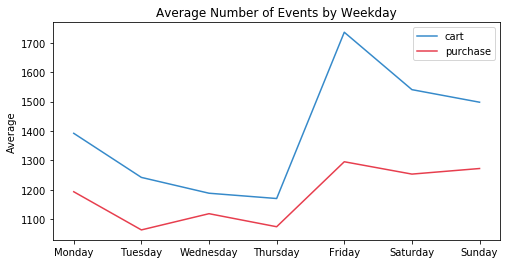

In [285]:
fig, ax = plt.subplots(figsize=(8,4))
plot(ax=ax)

plot(by_weekday['weekday_name'], by_weekday['cart_real'], marker='None', linestyle='-', label='cart',color ='#368aca')
plot(by_weekday['weekday_name'], by_weekday['purch_real'], marker='None', linestyle='-', label='purchase',color='#e73e4e')

ylabel('Average')
legend(loc='best')
title('Average Number of Events by Weekday')

show()

In [273]:
by_weekday2 = df_eda.groupby(['weekday_name','main_category']).agg({'purchase':'sum'})

by_weekday2.reset_index(level=0, inplace=True)
by_weekday2.reset_index(level=0, inplace=True)

weekdaynums = {'Monday':4,'Tuesday':5,'Wednesday':5,'Thursday':5,'Friday':4,'Saturday':4,'Sunday':4}
by_weekday2['num_days'] = by_weekday2['weekday_name'].map(weekdaynums)
by_weekday2['purch_real'] = by_weekday2['purchase']/by_weekday2['num_days']
by_weekday2

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
by_weekday2['weekday_name'] = pd.Categorical(by_weekday2['weekday_name'], categories=cats, ordered=True)
by_weekday2 = by_weekday2.sort_values('weekday_name')
by_weekday2 = by_weekday2.groupby(['weekday_name','main_category']).agg({'purch_real':'sum'})
bw2 = by_weekday2.unstack()
bw2

purch_real                                                   \
main_category accessories apparel appliances   auto computers construction   
weekday_name                                                                 
Monday               6.25   15.75     115.25  19.75     63.00        16.50   
Tuesday              4.40   13.80      98.60  21.40     46.00        12.00   
Wednesday            5.40   22.60     109.80  16.40     61.80        11.80   
Thursday             6.00   18.60     104.60  13.20     51.00        11.20   
Friday               6.25   20.50     151.00  26.50     62.00        11.25   
Saturday             4.25   18.75     119.50  28.75     68.75         9.75   
Sunday               3.75   17.25     147.50  24.50     58.50        20.75   

                                                                        \
main_category country_yard electronics furniture   kids medicine sport   
weekday_name                                                             
Monday                0.00      630.75     24.75   8.75      0.5  2.00   
Tuesday               0.00      571.20     16.00   7.40      0.2  2.40   
Wednesday             0.00      605.80     15.20  11.60      1.2  1.60   
Thursday              0.00      575.60     15.40  11.40      0.8  2.60   
Friday                0.00      660.00     23.75  12.00      1.0  3.50   
Saturday              0.00      654.75     19.00  10.25      1.0  1.25   
Sunday                0.75      645.50     24.00  14.25      0.0  1.00   

                          
main_category stationery  
weekday_name              
Monday               0.0  
Tuesday              0.6  
Wednesday            0.0  
Thursday             0.0  
Friday               0.0  
Saturday             0.0  
Sunday               0.0

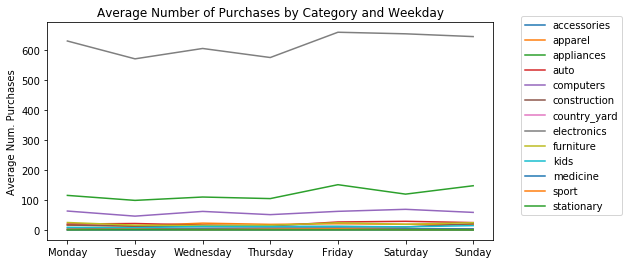

In [288]:
fig, ax = plt.subplots(figsize=(8,4))
bw2.plot(ax=ax)
xlabel('')
ylabel('Average Num. Purchases')
title('Average Number of Purchases by Category and Weekday')

L=plt.legend(bbox_to_anchor=(1.05, 1.05))
L.get_texts()[0].set_text('accessories')
L.get_texts()[1].set_text('apparel')
L.get_texts()[2].set_text('appliances')
L.get_texts()[3].set_text('auto')
L.get_texts()[4].set_text('computers')
L.get_texts()[5].set_text('construction')
L.get_texts()[6].set_text('country_yard')
L.get_texts()[7].set_text('electronics')
L.get_texts()[8].set_text('furniture')
L.get_texts()[9].set_text('kids')
L.get_texts()[10].set_text('medicine')
L.get_texts()[11].set_text('sport')
L.get_texts()[12].set_text('stationary')

# Preprocessing

In [19]:
df_sub = pd.read_csv('df_sub.csv')
df_sub.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:44 UTC,view,26500313,2053013563550729061,NaN,lucente,267.19,525856698,f72ea16b-4ec3-44f8-8fcd-35d89984b744
1,2019-10-01 00:00:46 UTC,view,4100126,2053013561218695907,NaN,sony,326.62,519885473,b70cb218-db90-4011-b582-0bd237109df1
2,2019-10-01 00:01:07 UTC,view,27700113,2053013560086233771,construction.tools.pump,leo,48.90,515630204,f9cc0313-5572-4894-a4eb-45d855f064cc
3,2019-10-01 00:01:10 UTC,view,4100126,2053013561218695907,NaN,sony,326.62,519885473,b70cb218-db90-4011-b582-0bd237109df1
4,2019-10-01 00:01:12 UTC,view,26500144,2053013563550729061,NaN,lucente,259.21,525856698,f72ea16b-4ec3-44f8-8fcd-35d89984b744


In [20]:
# create user_product column
df_sub['user_product'] = df_sub.user_id.astype(str) + df_sub.product_id.astype(str)

In [21]:
# create columns for buy, main category second category
df_sub['buy'] = df_sub['event_type'].apply(lambda x: 1 if x == 'purchase' else 0)
df_sub['main_category'] = df_sub['category_code'].str.split(".",n=2,expand=True)[0]
df_sub['second_category'] = df_sub['category_code'].str.split(".",n=2,expand=True)[1]

In [22]:
# convert event time to datetime format
df_sub['event_time'] = pd.to_datetime(df_sub['event_time']) #convert to datetime type

In [23]:
# create columns for day, weekday, and hour
df_sub['date']=df_sub['event_time'].dt.day
df_sub['weekday']=df_sub['event_time'].dt.weekday
df_sub['hours']=df_sub['event_time'].dt.hour

In [24]:
# move user product column to be first column
col_name="user_product"
first_col = df_sub.pop(col_name)
df_sub.insert(0, col_name, first_col)
df_sub.head(2)

,user_product,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,buy,main_category,second_category,date,weekday,hours
0,52585669826500313,2019-10-01 00:00:44+00:00,view,26500313,2053013563550729061,NaN,lucente,267.19,525856698,f72ea16b-4ec3-44f8-8fcd-35d89984b744,0,NaN,NaN,1,1,0
1,5198854734100126,2019-10-01 00:00:46+00:00,view,4100126,2053013561218695907,NaN,sony,326.62,519885473,b70cb218-db90-4011-b582-0bd237109df1,0,NaN,NaN,1,1,0


In [26]:
# filter to electronics, computers, and appliances (top three selling categories)
df_sub = df_sub.loc[df_sub['main_category'].isin(['electronics','computers','appliances'])]

In [43]:
df_sub[['main_category','second_category']].value_counts()

main_category  second_category
electronics    smartphone         545822
appliances     kitchen            192428
electronics    clocks              83556
               audio               80427
computers      notebook            76510
appliances     environment         64434
electronics    video               61249
computers      components          40969
               desktop             30560
               peripherals         27860
electronics    tablet              18554
               telephone           12948
appliances     iron                10337
               sewing_machine       8739
               personal             8545
               ironing_board        2405
electronics    camera               2180
computers      ebooks               1850
dtype: int64

In [66]:
# get median price by second category
medianprices = df_sub.groupby(df_sub['second_category'])['price'].median()
medianpricesdf = pd.DataFrame(medianprices).reset_index()
medianpricesdf = medianpricesdf.rename(columns={'price': 'medianprice'})
medianpricesdf     

,second_category,medianprice
0,audio,61.78
1,camera,410.78
2,clocks,166.28
3,components,103.73
4,desktop,463.31
5,ebooks,153.83
6,environment,99.75
7,iron,46.31
8,ironing_board,41.42
9,kitchen,205.90


In [67]:
# create feature for 
df_sub = pd.merge(df_sub, medianpricesdf, on ='second_category', how ='left') 
#df_sub['relativeprice'] = df_sub['price'] - df_sub['medianprice']
df_sub.head(3)

,user_product,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,buy,main_category,second_category,date,weekday,hours,medianprice
0,52585669821403078,2019-10-01 00:02:23+00:00,view,21403078,2053013561579406073,electronics.clocks,casio,39.05,525856698,f72ea16b-4ec3-44f8-8fcd-35d89984b744,0,electronics,clocks,1,1,0,166.28
1,52585669821402696,2019-10-01 00:02:30+00:00,view,21402696,2053013561579406073,electronics.clocks,NaN,24.97,525856698,f72ea16b-4ec3-44f8-8fcd-35d89984b744,0,electronics,clocks,1,1,0,166.28
2,52585669821403078,2019-10-01 00:03:48+00:00,view,21403078,2053013561579406073,electronics.clocks,casio,39.05,525856698,f72ea16b-4ec3-44f8-8fcd-35d89984b744,0,electronics,clocks,1,1,0,166.28


In [94]:
# create separate df with event time min, max, and duration for each unique user/product combo
df_max=df_sub.groupby(['user_product'], sort=False)['event_time'].max()
df_min=df_sub.groupby(['user_product'], sort=False)['event_time'].min()
df_merge= pd.merge(df_min, df_max, on=['user_product'],suffixes=["_min","_max"])
df_merge['duration'] = df_merge["event_time_max"] - df_merge["event_time_min"]

df_merge['first_date']=df_merge['event_time_min'].dt.day
df_merge['first_weekday']=df_merge['event_time_min'].dt.weekday
df_merge['first_hour']=df_merge['event_time_min'].dt.hour

df_merge['last_date']=df_merge['event_time_max'].dt.day
df_merge['last_weekday']=df_merge['event_time_max'].dt.weekday
df_merge['last_hour']=df_merge['event_time_max'].dt.hour

df_merge.reset_index()
df_merge.head()

,event_time_min,event_time_max,duration,first_date,first_weekday,first_hour,last_date,last_weekday,last_hour
user_product,,,,,,,,,
52585669821403078,2019-10-01 00:02:23+00:00,2019-10-01 00:03:48+00:00,0 days 00:01:25,1,1,0,1,1,0
52585669821402696,2019-10-01 00:02:30+00:00,2019-10-01 00:02:30+00:00,0 days 00:00:00,1,1,0,1,1,0
5414148871004858,2019-10-01 00:05:22+00:00,2019-10-07 01:41:53+00:00,6 days 01:36:31,1,1,0,7,0,1
5414148871004767,2019-10-01 00:07:45+00:00,2019-10-01 00:07:45+00:00,0 days 00:00:00,1,1,0,1,1,0
5414148871004833,2019-10-01 00:07:55+00:00,2019-10-12 09:09:10+00:00,11 days 09:01:15,1,1,0,12,5,9


In [95]:
# create columns to show for each user/product combo: number views, adds to cart, purchases, and sessions
df_cart=df_sub[df_sub['event_type']=='cart']
df_count_cart=df_cart.groupby(['user_product'], sort=False).size().to_frame(name = 'num_cart').reset_index()

df_view=df_sub[df_sub['event_type']=='view']
df_count_view=df_view.groupby(['user_product'], sort=False).size().to_frame(name = 'num_view').reset_index()

df_purchase=df_sub[df_sub['event_type']=='purchase']
df_count_purchase=df_purchase.groupby(['user_product'], sort=False).size().to_frame(name = 'num_purchase').reset_index()

df_session=df_sub[['user_product','user_session']]
df_count_session = df_session.groupby(['user_product'], sort=False).size().to_frame(name = 'num_sessions').reset_index()

In [96]:
# merge count dfs together
combo_df = pd.merge(df_sub, df_count_view, on ='user_product', how ='left') 
combo_df = pd.merge(combo_df, df_count_cart, on ='user_product', how ='left') 
combo_df = pd.merge(combo_df, df_count_purchase, on ='user_product', how ='left') 
combo_df = pd.merge(combo_df, df_count_session, on ='user_product', how ='left') 
combo_df = pd.merge(combo_df, df_merge, on ='user_product', how ='left') 

combo_df['num_cart'] = combo_df['num_cart'].fillna(0)
combo_df['num_purchase'] = combo_df['num_purchase'].fillna(0)
combo_df['num_view'] = combo_df['num_view'].fillna(0)

In [97]:
# drop duplicate user/products and excess columns
df = combo_df.drop_duplicates(subset='user_product', keep='first')
df.drop(['event_time','user_session','event_type','product_id','user_id','event_time_min','event_time_max'],inplace = True, axis = 1)
df.head(2)

,user_product,category_id,category_code,brand,price,buy,main_category,second_category,date,weekday,...,num_cart,num_purchase,num_sessions,duration,first_date,first_weekday,first_hour,last_date,last_weekday,last_hour
0,52585669821403078,2053013561579406073,electronics.clocks,casio,39.05,0,electronics,clocks,1,1,...,0.0,0.0,2,0 days 00:01:25,1,1,0,1,1,0
1,52585669821402696,2053013561579406073,electronics.clocks,NaN,24.97,0,electronics,clocks,1,1,...,0.0,0.0,1,0 days 00:00:00,1,1,0,1,1,0


In [98]:
# label encoding for brand column
# convert duration to duration in minutes
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['brand'] = df['brand'].fillna('0')
brand_labels = df['brand'].unique().tolist()
le.fit(brand_labels)
list(le.classes_)
df['brand'] = le.transform(df['brand'])
df['duration']=df['duration'].dt.total_seconds() / 60
df['buy'] = df['num_purchase'].apply(lambda x: 1 if x > 0 else 0)
df.drop(labels=['num_purchase'], axis=1, inplace = True)
df.head()

,user_product,category_id,category_code,brand,price,buy,main_category,second_category,date,weekday,...,num_view,num_cart,num_sessions,duration,first_date,first_weekday,first_hour,last_date,last_weekday,last_hour
0,52585669821403078,2053013561579406073,electronics.clocks,129,39.05,0,electronics,clocks,1,1,...,2.0,0.0,2,1.416667,1,1,0,1,1,0
1,52585669821402696,2053013561579406073,electronics.clocks,0,24.97,0,electronics,clocks,1,1,...,1.0,0.0,1,0.000000,1,1,0,1,1,0
3,5414148871004858,2053013555631882655,electronics.smartphone,581,134.42,0,electronics,smartphone,1,1,...,2.0,0.0,2,8736.516667,1,1,0,7,0,1
4,5414148871004767,2053013555631882655,electronics.smartphone,581,254.82,0,electronics,smartphone,1,1,...,1.0,0.0,1,0.000000,1,1,0,1,1,0
5,5414148871004833,2053013555631882655,electronics.smartphone,581,174.76,0,electronics,smartphone,1,1,...,10.0,0.0,10,16381.250000,1,1,0,12,5,9


In [99]:
# split categories into separate columns
df['main_category'] = df['category_code'].str.split(".",n=2,expand=True)[0]
df['second_category'] = df['category_code'].str.split(".",n=2,expand=True)[1]
df.drop(labels=['category_code'], axis=1, inplace = True)
df.head(3)

,user_product,category_id,brand,price,buy,main_category,second_category,date,weekday,hours,...,num_view,num_cart,num_sessions,duration,first_date,first_weekday,first_hour,last_date,last_weekday,last_hour
0,52585669821403078,2053013561579406073,129,39.05,0,electronics,clocks,1,1,0,...,2.0,0.0,2,1.416667,1,1,0,1,1,0
1,52585669821402696,2053013561579406073,0,24.97,0,electronics,clocks,1,1,0,...,1.0,0.0,1,0.000000,1,1,0,1,1,0
3,5414148871004858,2053013555631882655,581,134.42,0,electronics,smartphone,1,1,0,...,2.0,0.0,2,8736.516667,1,1,0,7,0,1


In [100]:
# make a copy of dataset
df_catid = copy.deepcopy(df)

In [101]:
# calculate difference from median price, remove unnecessary columns
df_catid['priceminusmedian'] = df_catid['price'] - df_catid['medianprice']
df_catid.drop(columns=['user_product','medianprice','second_category','num_sessions','first_date','first_weekday','first_hour'],axis=1,inplace=True)
df_catid.head()

,category_id,brand,price,buy,main_category,date,weekday,hours,num_view,num_cart,duration,last_date,last_weekday,last_hour,priceminusmedian
0,2053013561579406073,129,39.05,0,electronics,1,1,0,2.0,0.0,1.416667,1,1,0,-127.23
1,2053013561579406073,0,24.97,0,electronics,1,1,0,1.0,0.0,0.000000,1,1,0,-141.31
3,2053013555631882655,581,134.42,0,electronics,1,1,0,2.0,0.0,8736.516667,7,0,1,-143.55
4,2053013555631882655,581,254.82,0,electronics,1,1,0,1.0,0.0,0.000000,1,1,0,-23.15
5,2053013555631882655,581,174.76,0,electronics,1,1,0,10.0,0.0,16381.250000,12,5,9,-103.21


In [155]:
df_elec_prep = df_catid.loc[(df_catid['main_category'] == 'electronics') & (df_catid['brand'] > 0)]
df_comp_prep = df_catid.loc[(df_catid['main_category'] == 'computers') & (df_catid['brand'] > 0)]
df_app_prep = df_catid.loc[(df_catid['main_category'] == 'appliances') & (df_catid['brand'] > 0)]

In [156]:
df_elec_prep.drop(columns=['main_category','price','date','weekday','hours'],axis=1,inplace=True)
df_comp_prep.drop(columns=['main_category','price','date','weekday','hours'],axis=1,inplace=True)
df_app_prep.drop(columns=['main_category','price','date','weekday','hours'],axis=1,inplace=True)

In [157]:
df_elec_mod = df_elec_prep.sample(n=25000, replace=False, random_state=1)
df_comp_mod = df_comp_prep.sample(n=25000, replace=False, random_state=1)
df_app_mod = df_app_prep.sample(n=25000, replace=False, random_state=1)

In [158]:
df_elec_mod.to_csv('df_elec.csv',index=False)
df_comp_mod.to_csv('df_comp.csv',index=False)
df_app_mod.to_csv('df_app.csv',index=False)

# Modeling - Electronics

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [83]:
df = pd.read_csv('df_elec.csv')
# num sessions is highly correlated with num views
df.head()

,category_id,brand,buy,num_view,num_cart,duration,last_date,last_weekday,last_hour,priceminusmedian
0,2053013553341792533,44,0,1.0,0.0,0.00,27,6,10,293.55
1,2053013555631882655,581,1,5.0,0.0,19710.15,21,0,5,-26.56
2,2053013555631882655,449,0,2.0,0.0,0.50,22,1,19,-149.93
3,2053013555573162395,654,0,1.0,0.0,0.00,28,0,18,-19.38
4,2053013555631882655,581,0,1.0,0.0,0.00,14,0,5,-146.33


In [84]:
from sklearn.model_selection import train_test_split
y = df['buy'].values
X = df.drop(['buy'], axis = 1)

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=123)

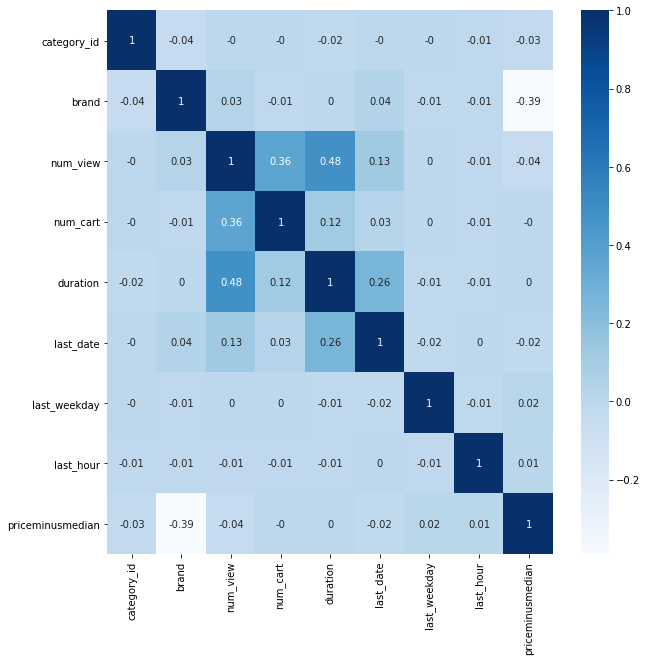

In [85]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix.round(2), annot=True, cmap='Blues',ax=ax);

In [86]:
from sklearn.model_selection import train_test_split
y = df['buy'].values
X = df.drop(['buy'], axis = 1)

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=123)

# use standard scaler to center features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Baseline Accuracy

In [87]:
len(df[df['buy'] == 0])/len(df)

0.96448

### Logistic Regression

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('log_reg', log_reg)])
solver = ['newton-c', 'lbfgs', 'liblinear']
penalty = ['l2']
C = [100, 10, 1.0, 0.1, 0.01, 0.001]
parameters = dict(log_reg__solver=solver, log_reg__penalty=penalty,log_reg__C=C)

log_reg_GS = GridSearchCV(pipe, parameters, scoring='f1')
log_reg_GS.fit(X_train, y_train)

print(log_reg_GS.best_estimator_.get_params()['log_reg'])
bestsolver = log_reg_GS.best_estimator_.get_params()['log_reg__solver']
bestC = log_reg_GS.best_estimator_.get_params()['log_reg__C']

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [18]:
logreg = LogisticRegression(solver = bestsolver, C = bestC, random_state = 123)

# set up model
name = "Logistic Regression"
logreg.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(logreg.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(logreg.score(X_test, y_test)))
model_pred = logreg.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[Logistic Regression]

Accuracy of classifier on training set: 0.97
Accuracy of classifier on test set: 0.97
------------------------------------------------------------

Predicted     0   1
Actual             
0          4804  16
1           128  52
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4820
           1       0.76      0.29      0.42       180

    accuracy                           0.97      5000
   macro avg       0.87      0.64      0.70      5000
weighted avg       0.97      0.97      0.96      5000



### Decision Tree

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
dec_tree = DecisionTreeClassifier()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('dec_tree', dec_tree)])
max_depth = [3, 5, 7, 9, 11, 13, 15]
criterion = ['gini','entropy']
parameters = dict(dec_tree__criterion = criterion, dec_tree__max_depth = max_depth)

dt_GS = GridSearchCV(pipe, parameters, scoring='f1')
dt_GS.fit(X_train, y_train)

print(dt_GS.best_estimator_.get_params()['dec_tree'])
bestdepth = dt_GS.best_estimator_.get_params()['dec_tree__max_depth']
bestcriterion = dt_GS.best_estimator_.get_params()['dec_tree__criterion']

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [89]:
dtree = DecisionTreeClassifier(criterion = bestcriterion, max_depth = bestdepth, random_state = 123)

# set up model
name = "Decision Tree"
dtree.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(dtree.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(dtree.score(X_test, y_test)))
model_pred = dtree.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[Decision Tree]

Accuracy of classifier on training set: 0.98
Accuracy of classifier on test set: 0.97
------------------------------------------------------------

Predicted     0   1
Actual             
0          4770  50
1            89  91
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4820
           1       0.65      0.51      0.57       180

    accuracy                           0.97      5000
   macro avg       0.81      0.75      0.78      5000
weighted avg       0.97      0.97      0.97      5000



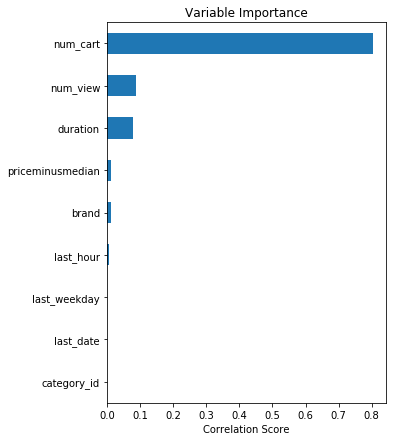

In [90]:
# plot variable importance
plt.figure(figsize=(5,7))
var_importance = (pd.Series(dtree.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh'))
plt.title("Variable Importance")
plt.xlabel("Correlation Score")
plt.show()

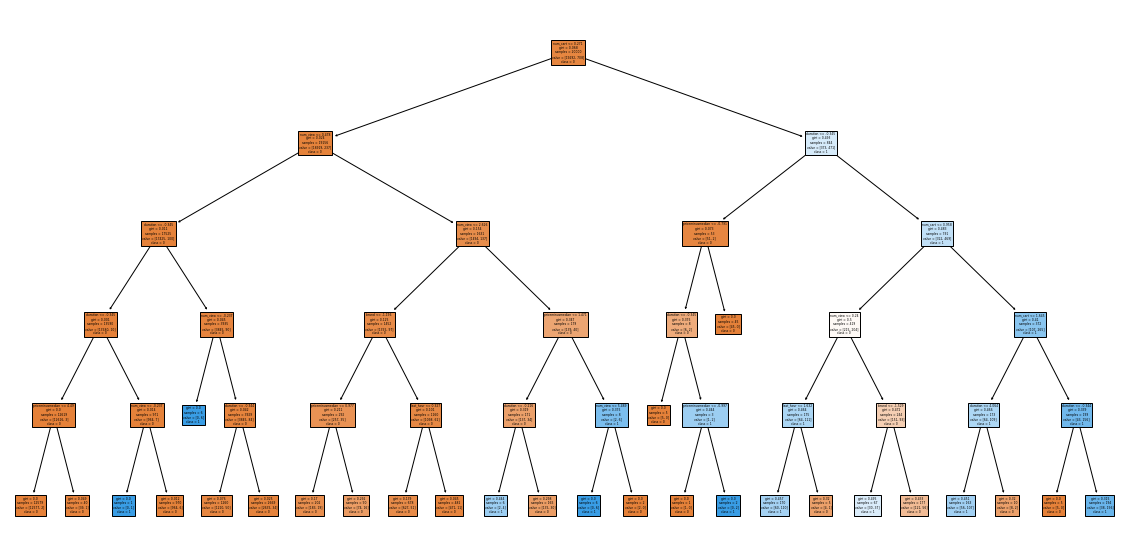

In [22]:
# plot decision tree
feature_names = list(X.columns.values) 
class_names = ["0","1"]
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(dtree, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

### Gaussian Naive Bayes

In [23]:
# run Gaussian Naive Bayes
gnb = GaussianNB()
name = "Gaussian Naive Bayes"
gnb.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(gnb.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(gnb.score(X_test, y_test)))
model_pred = gnb.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[Gaussian Naive Bayes]

Accuracy of classifier on training set: 0.96
Accuracy of classifier on test set: 0.95
------------------------------------------------------------

Predicted     0    1
Actual              
0          4699  121
1           107   73
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4820
           1       0.38      0.41      0.39       180

    accuracy                           0.95      5000
   macro avg       0.68      0.69      0.68      5000
weighted avg       0.96      0.95      0.96      5000



### KNN

In [24]:
knn = KNeighborsClassifier()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('knn', knn)])
n_neighbors = [3, 7, 9, 15, 31, 51]
parameters = dict(knn__n_neighbors=n_neighbors)

knn_GS = GridSearchCV(pipe, parameters)
knn_GS.fit(X_train, y_train)

bestn = knn_GS.best_estimator_.get_params()['knn__n_neighbors']
print(knn_GS.best_estimator_.get_params()['knn'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


In [25]:
knn_model = KNeighborsClassifier(n_neighbors = bestn)

# set up model
name = "KNN"
knn_model.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(knn_model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(knn_model.score(X_test, y_test)))
model_pred = knn_model.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[KNN]

Accuracy of classifier on training set: 0.97
Accuracy of classifier on test set: 0.97
------------------------------------------------------------

Predicted     0   1
Actual             
0          4807  13
1           133  47
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4820
           1       0.78      0.26      0.39       180

    accuracy                           0.97      5000
   macro avg       0.88      0.63      0.69      5000
weighted avg       0.97      0.97      0.96      5000



### SVM

In [26]:
svm = SVC()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('svm', svm)])
c = [100, 10, 1.0, 0.1, 0.01, 0.001]
parameters = dict(svm__C = c)

svm_GS = GridSearchCV(pipe, parameters)
svm_GS.fit(X_train, y_train)

bestc = svm_GS.best_estimator_.get_params()['svm__C']
print(svm_GS.best_estimator_.get_params()['svm'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [27]:
svm_model = SVC(C = bestc, probability=True, random_state = 123)

# set up model
name = "SVM"
svm_model.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(svm_model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(svm_model.score(X_test, y_test)))
model_pred = svm_model.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[SVM]

Accuracy of classifier on training set: 0.97
Accuracy of classifier on test set: 0.97
------------------------------------------------------------

Predicted     0   1
Actual             
0          4804  16
1           125  55
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4820
           1       0.77      0.31      0.44       180

    accuracy                           0.97      5000
   macro avg       0.87      0.65      0.71      5000
weighted avg       0.97      0.97      0.97      5000



### Random Forest

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
randfor = RandomForestClassifier()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('randfor', randfor)])
n_estimators = [5, 10, 50, 100, 200]
max_depth = [3, 5, 7, 9, 11, 13, 15]

parameters = dict(randfor__max_depth=max_depth, 
                  randfor__n_estimators=n_estimators)

rf_GS = GridSearchCV(pipe, parameters, scoring='f1')
rf_GS.fit(X_train, y_train)

print(rf_GS.best_estimator_.get_params()['randfor'])
best_nestimators = rf_GS.best_estimator_.get_params()['randfor__n_estimators']
best_maxdepth = rf_GS.best_estimator_.get_params()['randfor__max_depth']

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [92]:
rf_model = RandomForestClassifier(n_estimators = best_nestimators, max_depth = best_maxdepth, random_state = 123)

# set up model
name = "Random Forest"
rf_model.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(rf_model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(rf_model.score(X_test, y_test)))
model_pred = rf_model.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[Random Forest]

Accuracy of classifier on training set: 0.99
Accuracy of classifier on test set: 0.98
------------------------------------------------------------

Predicted     0   1
Actual             
0          4787  33
1            90  90
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4820
           1       0.73      0.50      0.59       180

    accuracy                           0.98      5000
   macro avg       0.86      0.75      0.79      5000
weighted avg       0.97      0.98      0.97      5000



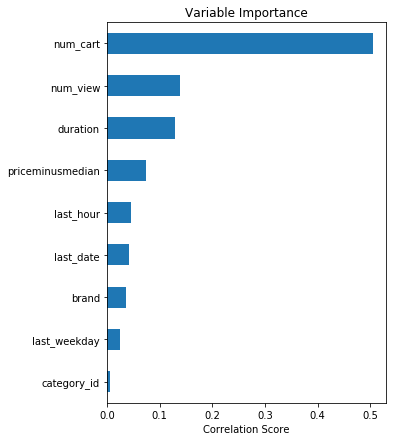

In [93]:
# plot variable importance
plt.figure(figsize=(5,7))
var_importance = (pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh'))
plt.title("Variable Importance")
plt.xlabel("Correlation Score")
plt.show()

### GBM

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('gbm', gbm)])
n_estimators = [5, 10, 50, 100, 200]
max_depth = [3, 5, 7, 9, 11, 13, 15]

parameters = dict(gbm__max_depth=max_depth, 
                  gbm__n_estimators=n_estimators)

gbm_GS = GridSearchCV(pipe, parameters, scoring='f1')
gbm_GS.fit(X_train, y_train)

print(gbm_GS.best_estimator_.get_params()['gbm'])
best_nestimators = gbm_GS.best_estimator_.get_params()['gbm__n_estimators']
best_maxdepth = gbm_GS.best_estimator_.get_params()['gbm__max_depth']

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [95]:
gbm_model = GradientBoostingClassifier(n_estimators = best_nestimators, max_depth = best_maxdepth, random_state = 123)

# set up model
name = "GBM"
gbm_model.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(gbm_model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(gbm_model.score(X_test, y_test)))
model_pred = gbm_model.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[GBM]

Accuracy of classifier on training set: 0.98
Accuracy of classifier on test set: 0.97
------------------------------------------------------------

Predicted     0   1
Actual             
0          4787  33
1            93  87
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4820
           1       0.72      0.48      0.58       180

    accuracy                           0.97      5000
   macro avg       0.85      0.74      0.78      5000
weighted avg       0.97      0.97      0.97      5000



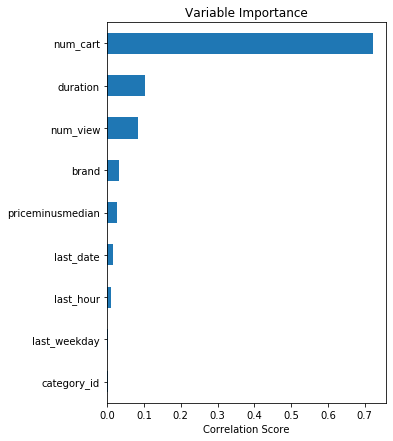

In [96]:
# plot variable importance
plt.figure(figsize=(5,7))
var_importance = (pd.Series(gbm_model.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh'))
plt.title("Variable Importance")
plt.xlabel("Correlation Score")
plt.show()

### Neural Net

In [32]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('nn', nn)])
hidden_layer_sizes = [(50,50,50), (50,100,50), (100,)]
activation = ['tanh', 'relu']
alpha = [0.0001, 0.05]

parameters = dict(nn__hidden_layer_sizes = hidden_layer_sizes, 
                  nn__activation = activation,
                  nn__alpha = alpha)

nn_GS = GridSearchCV(pipe, parameters, scoring='f1')
nn_GS.fit(X_train, y_train)

print(nn_GS.best_estimator_.get_params()['nn'])
best_hidden_layer_sizes = nn_GS.best_estimator_.get_params()['nn__hidden_layer_sizes']
best_activation = nn_GS.best_estimator_.get_params()['nn__activation']
best_alpha = nn_GS.best_estimator_.get_params()['nn__alpha']

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [33]:
nn_model = MLPClassifier(hidden_layer_sizes = best_hidden_layer_sizes,
                         activation = best_activation,
                         alpha = best_alpha,
                         random_state = 123)

# set up model
name = "Neural Net"
nn_model.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(nn_model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(nn_model.score(X_test, y_test)))
model_pred = nn_model.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[Neural Net]

Accuracy of classifier on training set: 0.98
Accuracy of classifier on test set: 0.97
------------------------------------------------------------

Predicted     0   1
Actual             
0          4778  42
1            97  83
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4820
           1       0.66      0.46      0.54       180

    accuracy                           0.97      5000
   macro avg       0.82      0.73      0.76      5000
weighted avg       0.97      0.97      0.97      5000



### AU-ROC Scores and ROC Curves

No Skill (AU-ROC) = 0.500
Decision Tree (AU-ROC) = 0.920
Logistic Regression (AU-ROC) = 0.859
Gaussian Naive Bayes (AU-ROC) = 0.859
K-NN (AU-ROC) = 0.787
SVM (AU-ROC) = 0.820
Random Forest (AU-ROC) = 0.949
Gradient Boosting (AU-ROC) = 0.948
Neural Net (AU-ROC) = 0.935


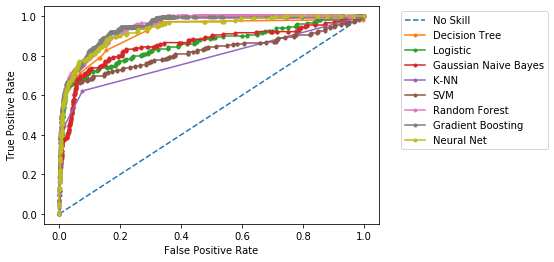

In [35]:
ns_probs = [0 for _ in range(len(y_test))]
dt_probs = dtree.predict_proba(X_test)
lr_probs = logreg.predict_proba(X_test)
gnb_probs = gnb.predict_proba(X_test)
knn_probs = knn_model.predict_proba(X_test)
svm_probs = svm_model.predict_proba(X_test)
rf_probs = rf_model.predict_proba(X_test)
gbm_probs = gbm_model.predict_proba(X_test)
nn_probs = nn_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]
lr_probs = lr_probs[:, 1]
gnb_probs = gnb_probs[:, 1]
knn_probs = knn_probs[:, 1]
svm_probs = svm_probs[:, 1]
rf_probs = rf_probs[:, 1]
gbm_probs = gbm_probs[:, 1]
nn_probs = nn_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gbm_auc = roc_auc_score(y_test, gbm_probs)
nn_auc = roc_auc_score(y_test, nn_probs)

# summarize scores
print('No Skill (AU-ROC) = %.3f' % (ns_auc))
print('Decision Tree (AU-ROC) = %.3f' % (dt_auc))
print('Logistic Regression (AU-ROC) = %.3f' % (lr_auc))
print('Gaussian Naive Bayes (AU-ROC) = %.3f' % (gnb_auc))
print('K-NN (AU-ROC) = %.3f' % (knn_auc))
print('SVM (AU-ROC) = %.3f' % (svm_auc))
print('Random Forest (AU-ROC) = %.3f' % (rf_auc))
print('Gradient Boosting (AU-ROC) = %.3f' % (gbm_auc))
print('Neural Net (AU-ROC) = %.3f' % (nn_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gbm_fpr, gbm_tpr, _ = roc_curve(y_test, gbm_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='K-NN')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.plot(gbm_fpr, gbm_tpr, marker='.', label='Gradient Boosting')
pyplot.plot(nn_fpr, nn_tpr, marker='.', label='Neural Net')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# show the plot
pyplot.show()

# Modeling - Computers

In [97]:
df = pd.read_csv('df_comp.csv')
# num sessions is highly correlated with num views
df.head()

,category_id,brand,buy,num_view,num_cart,duration,last_date,last_weekday,last_hour,priceminusmedian
0,2053013558920217191,3,0,4.0,0.0,2.316667,18,4,19,1621.92
1,2053013554189041997,378,0,2.0,0.0,4287.166667,13,6,13,0.00
2,2053013558920217191,60,0,2.0,0.0,0.466667,17,3,16,51.74
3,2053013558920217191,3,0,1.0,0.0,0.000000,27,6,7,-205.43
4,2053013561092866779,71,0,3.0,0.0,6541.483333,6,6,2,514.06


In [98]:
from sklearn.model_selection import train_test_split
y = df['buy'].values
X = df.drop(['buy'], axis = 1)

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=123)

In [99]:
from sklearn.model_selection import train_test_split
y = df['buy'].values
X = df.drop(['buy'], axis = 1)

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=123)

# use standard scaler to center features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Baseline Accuracy

In [100]:
len(df[df['buy'] == 0])/len(df)

0.98468

### Logistic Regression

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('log_reg', log_reg)])
solver = ['newton-c', 'lbfgs', 'liblinear']
penalty = ['l2']
C = [100, 10, 1.0, 0.1, 0.01, 0.001]
parameters = dict(log_reg__solver=solver, log_reg__penalty=penalty,log_reg__C=C)

log_reg_GS = GridSearchCV(pipe, parameters, scoring='f1')
log_reg_GS.fit(X_train, y_train)

print(log_reg_GS.best_estimator_.get_params()['log_reg'])
bestsolver = log_reg_GS.best_estimator_.get_params()['log_reg__solver']
bestC = log_reg_GS.best_estimator_.get_params()['log_reg__C']

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [41]:
logreg = LogisticRegression(solver = bestsolver, C = bestC, random_state = 123)

# set up model
name = "Logistic Regression"
logreg.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(logreg.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(logreg.score(X_test, y_test)))
model_pred = logreg.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[Logistic Regression]

Accuracy of classifier on training set: 0.98
Accuracy of classifier on test set: 0.99
------------------------------------------------------------

Predicted     0  1
Actual            
0          4918  5
1            68  9
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4923
           1       0.64      0.12      0.20        77

    accuracy                           0.99      5000
   macro avg       0.81      0.56      0.60      5000
weighted avg       0.98      0.99      0.98      5000



### Decision Tree

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
dec_tree = DecisionTreeClassifier()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('dec_tree', dec_tree)])
max_depth = [3, 5, 7, 9, 11, 13, 15]
criterion = ['gini','entropy']
parameters = dict(dec_tree__criterion = criterion, dec_tree__max_depth = max_depth)

dt_GS = GridSearchCV(pipe, parameters, scoring='f1')
dt_GS.fit(X_train, y_train)

print(dt_GS.best_estimator_.get_params()['dec_tree'])
bestdepth = dt_GS.best_estimator_.get_params()['dec_tree__max_depth']
bestcriterion = dt_GS.best_estimator_.get_params()['dec_tree__criterion']

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [43]:
dtree = DecisionTreeClassifier(criterion = bestcriterion, max_depth = bestdepth, random_state = 123)

# set up model
name = "Decision Tree"
dtree.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(dtree.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(dtree.score(X_test, y_test)))
model_pred = dtree.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[Decision Tree]

Accuracy of classifier on training set: 0.99
Accuracy of classifier on test set: 0.98
------------------------------------------------------------

Predicted     0   1
Actual             
0          4893  30
1            49  28
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4923
           1       0.48      0.36      0.41        77

    accuracy                           0.98      5000
   macro avg       0.74      0.68      0.70      5000
weighted avg       0.98      0.98      0.98      5000



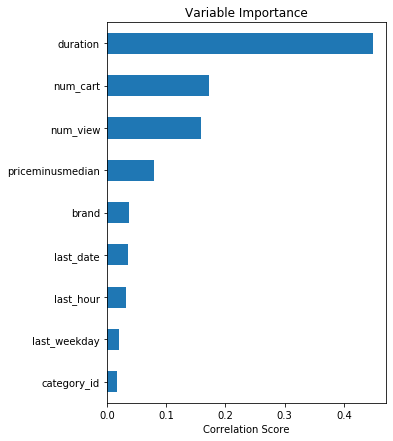

In [44]:
# plot variable importance
plt.figure(figsize=(5,7))
var_importance = (pd.Series(dtree.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh'))
plt.title("Variable Importance")
plt.xlabel("Correlation Score")
plt.show()

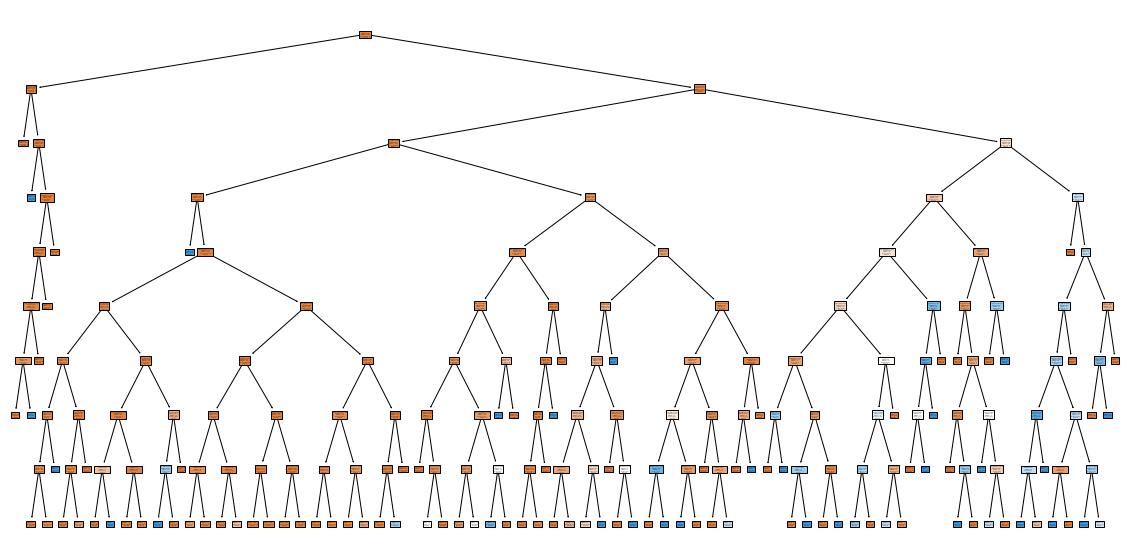

In [45]:
# plot decision tree
feature_names = list(X.columns.values) 
class_names = ["0","1"]
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(dtree, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

### Gaussian Naive Bayes

In [46]:
# run Gaussian Naive Bayes
gnb = GaussianNB()
name = "Gaussian Naive Bayes"
gnb.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(gnb.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(gnb.score(X_test, y_test)))
model_pred = gnb.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[Gaussian Naive Bayes]

Accuracy of classifier on training set: 0.96
Accuracy of classifier on test set: 0.96
------------------------------------------------------------

Predicted     0    1
Actual              
0          4773  150
1            35   42
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4923
           1       0.22      0.55      0.31        77

    accuracy                           0.96      5000
   macro avg       0.61      0.76      0.65      5000
weighted avg       0.98      0.96      0.97      5000



### KNN

In [47]:
knn = KNeighborsClassifier()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('knn', knn)])
n_neighbors = [3, 7, 9, 15, 31, 51]
parameters = dict(knn__n_neighbors=n_neighbors)

knn_GS = GridSearchCV(pipe, parameters)
knn_GS.fit(X_train, y_train)

bestn = knn_GS.best_estimator_.get_params()['knn__n_neighbors']
print(knn_GS.best_estimator_.get_params()['knn'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')


In [48]:
knn_model = KNeighborsClassifier(n_neighbors = bestn)

# set up model
name = "KNN"
knn_model.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(knn_model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(knn_model.score(X_test, y_test)))
model_pred = knn_model.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[KNN]

Accuracy of classifier on training set: 0.99
Accuracy of classifier on test set: 0.99
------------------------------------------------------------

Predicted     0  1
Actual            
0          4920  3
1            68  9
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4923
           1       0.75      0.12      0.20        77

    accuracy                           0.99      5000
   macro avg       0.87      0.56      0.60      5000
weighted avg       0.98      0.99      0.98      5000



### SVM

In [49]:
svm = SVC()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('svm', svm)])
c = [100, 10, 1.0, 0.1, 0.01, 0.001]
parameters = dict(svm__C = c)

svm_GS = GridSearchCV(pipe, parameters)
svm_GS.fit(X_train, y_train)

bestc = svm_GS.best_estimator_.get_params()['svm__C']
print(svm_GS.best_estimator_.get_params()['svm'])

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [50]:
svm_model = SVC(C = bestc, probability=True, random_state = 123)

# set up model
name = "SVM"
svm_model.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(svm_model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(svm_model.score(X_test, y_test)))
model_pred = svm_model.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[SVM]

Accuracy of classifier on training set: 0.98
Accuracy of classifier on test set: 0.98
------------------------------------------------------------

Predicted     0
Actual         
0          4923
1            77
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4923
           1       0.00      0.00      0.00        77

    accuracy                           0.98      5000
   macro avg       0.49      0.50      0.50      5000
weighted avg       0.97      0.98      0.98      5000



### Random Forest

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
randfor = RandomForestClassifier()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('randfor', randfor)])
n_estimators = [5, 10, 50, 100, 200]
max_depth = [3, 5, 7, 9, 11, 13, 15]

parameters = dict(randfor__max_depth=max_depth, 
                  randfor__n_estimators=n_estimators)

rf_GS = GridSearchCV(pipe, parameters, scoring='f1')
rf_GS.fit(X_train, y_train)

print(rf_GS.best_estimator_.get_params()['randfor'])
best_nestimators = rf_GS.best_estimator_.get_params()['randfor__n_estimators']
best_maxdepth = rf_GS.best_estimator_.get_params()['randfor__max_depth']

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [102]:
rf_model = RandomForestClassifier(n_estimators = best_nestimators, max_depth = best_maxdepth, random_state = 123)

# set up model
name = "Random Forest"
rf_model.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(rf_model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(rf_model.score(X_test, y_test)))
model_pred = rf_model.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[Random Forest]

Accuracy of classifier on training set: 1.00
Accuracy of classifier on test set: 0.98
------------------------------------------------------------

Predicted     0   1
Actual             
0          4906  17
1            62  15
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4923
           1       0.47      0.19      0.28        77

    accuracy                           0.98      5000
   macro avg       0.73      0.60      0.63      5000
weighted avg       0.98      0.98      0.98      5000



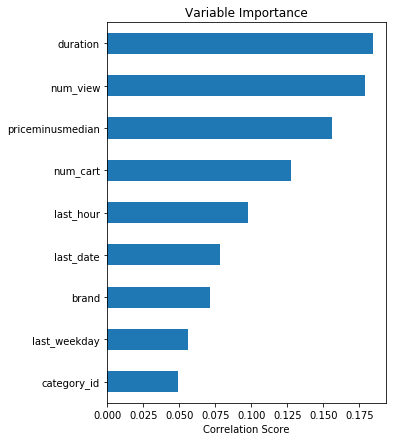

In [103]:
# plot variable importance
plt.figure(figsize=(5,7))
var_importance = (pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh'))
plt.title("Variable Importance")
plt.xlabel("Correlation Score")
plt.show()

### GBM

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('gbm', gbm)])
n_estimators = [5, 10, 50, 100, 200]
max_depth = [3, 5, 7, 9, 11, 13, 15]

parameters = dict(gbm__max_depth=max_depth, 
                  gbm__n_estimators=n_estimators)

gbm_GS = GridSearchCV(pipe, parameters, scoring='f1')
gbm_GS.fit(X_train, y_train)

print(gbm_GS.best_estimator_.get_params()['gbm'])
best_nestimators = gbm_GS.best_estimator_.get_params()['gbm__n_estimators']
best_maxdepth = gbm_GS.best_estimator_.get_params()['gbm__max_depth']

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [105]:
gbm_model = GradientBoostingClassifier(n_estimators = best_nestimators, max_depth = best_maxdepth, random_state = 123)

# set up model
name = "GBM"
gbm_model.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(gbm_model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(gbm_model.score(X_test, y_test)))
model_pred = gbm_model.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[GBM]

Accuracy of classifier on training set: 0.99
Accuracy of classifier on test set: 0.98
------------------------------------------------------------

Predicted     0   1
Actual             
0          4899  24
1            58  19
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4923
           1       0.44      0.25      0.32        77

    accuracy                           0.98      5000
   macro avg       0.72      0.62      0.65      5000
weighted avg       0.98      0.98      0.98      5000



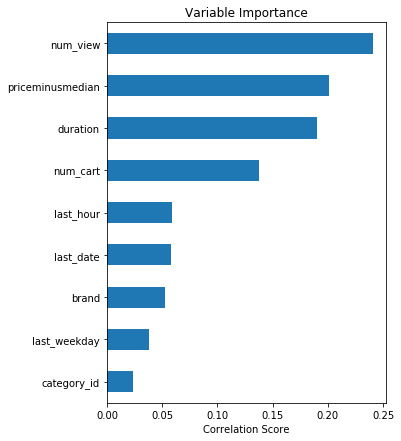

In [106]:
# plot variable importance
plt.figure(figsize=(5,7))
var_importance = (pd.Series(gbm_model.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh'))
plt.title("Variable Importance")
plt.xlabel("Correlation Score")
plt.show()

### Neural Net

In [56]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('nn', nn)])
hidden_layer_sizes = [(50,50,50), (50,100,50), (100,)]
activation = ['tanh', 'relu']
alpha = [0.0001, 0.05]
parameters = dict(nn__hidden_layer_sizes = hidden_layer_sizes, 
                  nn__activation = activation,
                  nn__alpha = alpha)

nn_GS = GridSearchCV(pipe, parameters, scoring='f1')
nn_GS.fit(X_train, y_train)

print(nn_GS.best_estimator_.get_params()['nn'])
best_hidden_layer_sizes = nn_GS.best_estimator_.get_params()['nn__hidden_layer_sizes']
best_activation = nn_GS.best_estimator_.get_params()['nn__activation']
best_alpha = nn_GS.best_estimator_.get_params()['nn__alpha']

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [57]:
nn_model = MLPClassifier(hidden_layer_sizes = best_hidden_layer_sizes,
                         activation = best_activation,
                         alpha = best_alpha,
                         random_state = 123)

# set up model
name = "Neural Net"
nn_model.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(nn_model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(nn_model.score(X_test, y_test)))
model_pred = nn_model.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[Neural Net]

Accuracy of classifier on training set: 1.00
Accuracy of classifier on test set: 0.98
------------------------------------------------------------

Predicted     0   1
Actual             
0          4890  33
1            54  23
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4923
           1       0.41      0.30      0.35        77

    accuracy                           0.98      5000
   macro avg       0.70      0.65      0.67      5000
weighted avg       0.98      0.98      0.98      5000



### AU-ROC Scores and ROC Curves

No Skill (AU-ROC) = 0.500
Decision Tree (AU-ROC) = 0.796
Logistic Regression (AU-ROC) = 0.875
Gaussian Naive Bayes (AU-ROC) = 0.901
K-NN (AU-ROC) = 0.845
SVM (AU-ROC) = 0.682
Random Forest (AU-ROC) = 0.952
Gradient Boosting (AU-ROC) = 0.952
Neural Net (AU-ROC) = 0.860


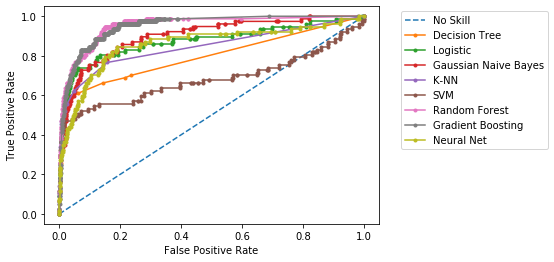

In [58]:
ns_probs = [0 for _ in range(len(y_test))]
dt_probs = dtree.predict_proba(X_test)
lr_probs = logreg.predict_proba(X_test)
gnb_probs = gnb.predict_proba(X_test)
knn_probs = knn_model.predict_proba(X_test)
svm_probs = svm_model.predict_proba(X_test)
rf_probs = rf_model.predict_proba(X_test)
gbm_probs = gbm_model.predict_proba(X_test)
nn_probs = nn_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]
lr_probs = lr_probs[:, 1]
gnb_probs = gnb_probs[:, 1]
knn_probs = knn_probs[:, 1]
svm_probs = svm_probs[:, 1]
rf_probs = rf_probs[:, 1]
gbm_probs = gbm_probs[:, 1]
nn_probs = nn_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gbm_auc = roc_auc_score(y_test, gbm_probs)
nn_auc = roc_auc_score(y_test, nn_probs)

# summarize scores
print('No Skill (AU-ROC) = %.3f' % (ns_auc))
print('Decision Tree (AU-ROC) = %.3f' % (dt_auc))
print('Logistic Regression (AU-ROC) = %.3f' % (lr_auc))
print('Gaussian Naive Bayes (AU-ROC) = %.3f' % (gnb_auc))
print('K-NN (AU-ROC) = %.3f' % (knn_auc))
print('SVM (AU-ROC) = %.3f' % (svm_auc))
print('Random Forest (AU-ROC) = %.3f' % (rf_auc))
print('Gradient Boosting (AU-ROC) = %.3f' % (gbm_auc))
print('Neural Net (AU-ROC) = %.3f' % (nn_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gbm_fpr, gbm_tpr, _ = roc_curve(y_test, gbm_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='K-NN')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.plot(gbm_fpr, gbm_tpr, marker='.', label='Gradient Boosting')
pyplot.plot(nn_fpr, nn_tpr, marker='.', label='Neural Net')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# show the plot
pyplot.show()

# Modeling - Appliances

In [107]:
df = pd.read_csv('df_app.csv')
# num sessions is highly correlated with num views
df.head()

,category_id,brand,buy,num_view,num_cart,duration,last_date,last_weekday,last_hour,priceminusmedian
0,2053013552351936731,29,0,7.0,0.0,682.133333,20,6,4,224.12
1,2053013563944993659,296,0,1.0,0.0,0.000000,19,5,16,80.52
2,2053013563835941749,337,0,2.0,0.0,0.333333,24,3,17,173.00
3,2053013565983425517,720,0,1.0,0.0,0.000000,14,0,16,198.58
4,2053013563911439225,337,0,5.0,0.0,4024.350000,18,4,5,143.72


In [108]:
from sklearn.model_selection import train_test_split
y = df['buy'].values
X = df.drop(['buy'], axis = 1)

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=123)

In [109]:
from sklearn.model_selection import train_test_split
y = df['buy'].values
X = df.drop(['buy'], axis = 1)

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=123)

# use standard scaler to center features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Baseline Accuracy

In [110]:
len(df[df['buy'] == 0])/len(df)

0.9766

### Logistic Regression

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('log_reg', log_reg)])
solver = ['newton-c', 'lbfgs', 'liblinear']
penalty = ['l2']
C = [100, 10, 1.0, 0.1, 0.01, 0.001]
parameters = dict(log_reg__solver=solver, log_reg__penalty=penalty,log_reg__C=C)

log_reg_GS = GridSearchCV(pipe, parameters, scoring='f1')
log_reg_GS.fit(X_train, y_train)

print(log_reg_GS.best_estimator_.get_params()['log_reg'])
bestsolver = log_reg_GS.best_estimator_.get_params()['log_reg__solver']
bestC = log_reg_GS.best_estimator_.get_params()['log_reg__C']

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [64]:
logreg = LogisticRegression(solver = bestsolver, C = bestC, random_state = 123)

# set up model
name = "Logistic Regression"
logreg.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(logreg.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(logreg.score(X_test, y_test)))
model_pred = logreg.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[Logistic Regression]

Accuracy of classifier on training set: 0.98
Accuracy of classifier on test set: 0.98
------------------------------------------------------------

Predicted     0   1
Actual             
0          4861  14
1           109  16
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4875
           1       0.53      0.13      0.21       125

    accuracy                           0.98      5000
   macro avg       0.76      0.56      0.60      5000
weighted avg       0.97      0.98      0.97      5000



### Decision Tree

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
dec_tree = DecisionTreeClassifier()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('dec_tree', dec_tree)])
max_depth = [3, 5, 7, 9, 11, 13, 15]
criterion = ['gini','entropy']
parameters = dict(dec_tree__criterion = criterion, dec_tree__max_depth = max_depth)

dt_GS = GridSearchCV(pipe, parameters, scoring='f1')
dt_GS.fit(X_train, y_train)

print(dt_GS.best_estimator_.get_params()['dec_tree'])
bestdepth = dt_GS.best_estimator_.get_params()['dec_tree__max_depth']
bestcriterion = dt_GS.best_estimator_.get_params()['dec_tree__criterion']

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [66]:
dtree = DecisionTreeClassifier(criterion = bestcriterion, max_depth = bestdepth, random_state = 123)

# set up model
name = "Decision Tree"
dtree.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(dtree.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(dtree.score(X_test, y_test)))
model_pred = dtree.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[Decision Tree]

Accuracy of classifier on training set: 0.98
Accuracy of classifier on test set: 0.98
------------------------------------------------------------

Predicted     0   1
Actual             
0          4849  26
1            92  33
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4875
           1       0.56      0.26      0.36       125

    accuracy                           0.98      5000
   macro avg       0.77      0.63      0.67      5000
weighted avg       0.97      0.98      0.97      5000



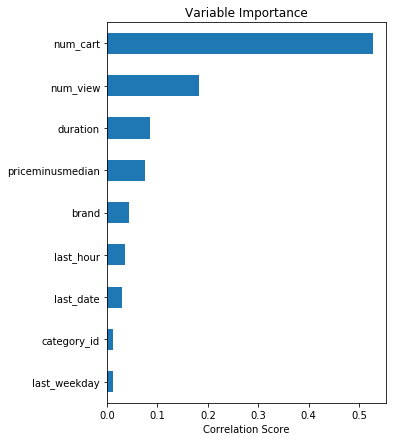

In [67]:
# plot variable importance
plt.figure(figsize=(5,7))
var_importance = (pd.Series(dtree.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh'))
plt.title("Variable Importance")
plt.xlabel("Correlation Score")
plt.show()

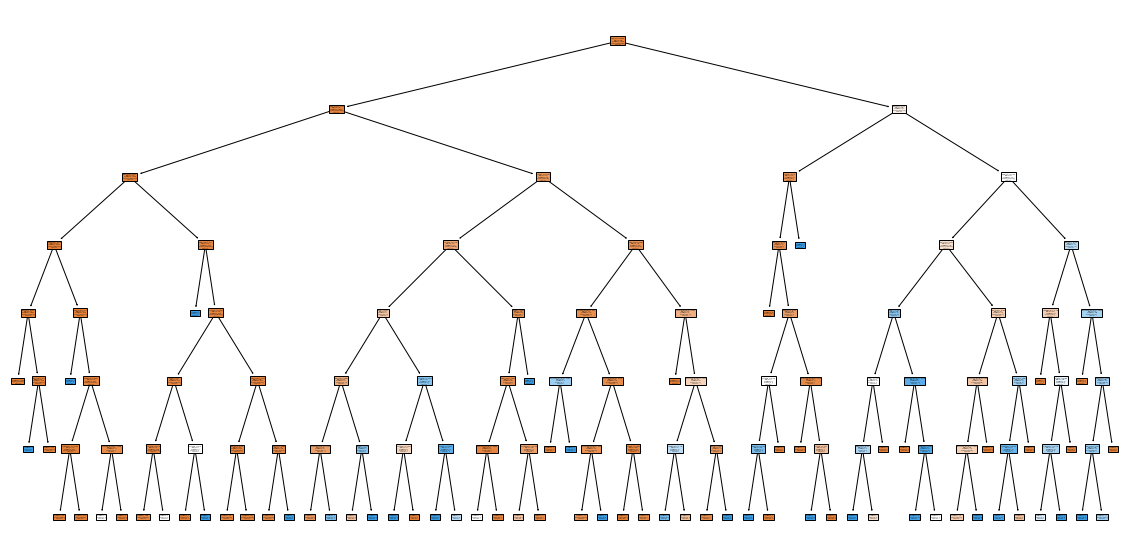

In [68]:
# plot decision tree
feature_names = list(X.columns.values) 
class_names = ["0","1"]
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(dtree, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

### Gaussian Naive Bayes

In [69]:
# run Gaussian Naive Bayes
gnb = GaussianNB()
name = "Gaussian Naive Bayes"
gnb.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(gnb.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(gnb.score(X_test, y_test)))
model_pred = gnb.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[Gaussian Naive Bayes]

Accuracy of classifier on training set: 0.95
Accuracy of classifier on test set: 0.95
------------------------------------------------------------

Predicted     0    1
Actual              
0          4681  194
1            69   56
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4875
           1       0.22      0.45      0.30       125

    accuracy                           0.95      5000
   macro avg       0.60      0.70      0.64      5000
weighted avg       0.97      0.95      0.96      5000



### KNN

In [70]:
knn = KNeighborsClassifier()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('knn', knn)])
n_neighbors = [3, 7, 9, 15, 31, 51]
parameters = dict(knn__n_neighbors=n_neighbors)

knn_GS = GridSearchCV(pipe, parameters)
knn_GS.fit(X_train, y_train)

bestn = knn_GS.best_estimator_.get_params()['knn__n_neighbors']
print(knn_GS.best_estimator_.get_params()['knn'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')


In [71]:
knn_model = KNeighborsClassifier(n_neighbors = bestn)

# set up model
name = "KNN"
knn_model.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(knn_model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(knn_model.score(X_test, y_test)))
model_pred = knn_model.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[KNN]

Accuracy of classifier on training set: 0.98
Accuracy of classifier on test set: 0.98
------------------------------------------------------------

Predicted     0   1
Actual             
0          4867   8
1           115  10
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4875
           1       0.56      0.08      0.14       125

    accuracy                           0.98      5000
   macro avg       0.77      0.54      0.56      5000
weighted avg       0.97      0.98      0.97      5000



### SVM

In [72]:
svm = SVC()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('svm', svm)])
c = [100, 10, 1.0, 0.1, 0.01, 0.001]
parameters = dict(svm__C = c)

svm_GS = GridSearchCV(pipe, parameters)
svm_GS.fit(X_train, y_train)

bestc = svm_GS.best_estimator_.get_params()['svm__C']
print(svm_GS.best_estimator_.get_params()['svm'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [73]:
svm_model = SVC(C = bestc, probability=True, random_state = 123)

# set up model
name = "SVM"
svm_model.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(svm_model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(svm_model.score(X_test, y_test)))
model_pred = svm_model.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[SVM]

Accuracy of classifier on training set: 0.98
Accuracy of classifier on test set: 0.98
------------------------------------------------------------

Predicted     0   1
Actual             
0          4867   8
1           115  10
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4875
           1       0.56      0.08      0.14       125

    accuracy                           0.98      5000
   macro avg       0.77      0.54      0.56      5000
weighted avg       0.97      0.98      0.97      5000



### Random Forest

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
randfor = RandomForestClassifier()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('randfor', randfor)])
n_estimators = [5, 10, 50, 100, 200]
max_depth = [3, 5, 7, 9, 11, 13, 15]

parameters = dict(randfor__max_depth=max_depth, 
                  randfor__n_estimators=n_estimators)

rf_GS = GridSearchCV(pipe, parameters, scoring='f1')
rf_GS.fit(X_train, y_train)

print(rf_GS.best_estimator_.get_params()['randfor'])
best_nestimators = rf_GS.best_estimator_.get_params()['randfor__n_estimators']
best_maxdepth = rf_GS.best_estimator_.get_params()['randfor__max_depth']

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [112]:
rf_model = RandomForestClassifier(n_estimators = best_nestimators, max_depth = best_maxdepth, random_state = 123)

# set up model
name = "Random Forest"
rf_model.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(rf_model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(rf_model.score(X_test, y_test)))
model_pred = rf_model.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[Random Forest]

Accuracy of classifier on training set: 0.99
Accuracy of classifier on test set: 0.98
------------------------------------------------------------

Predicted     0   1
Actual             
0          4855  20
1           104  21
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4875
           1       0.51      0.17      0.25       125

    accuracy                           0.98      5000
   macro avg       0.75      0.58      0.62      5000
weighted avg       0.97      0.98      0.97      5000



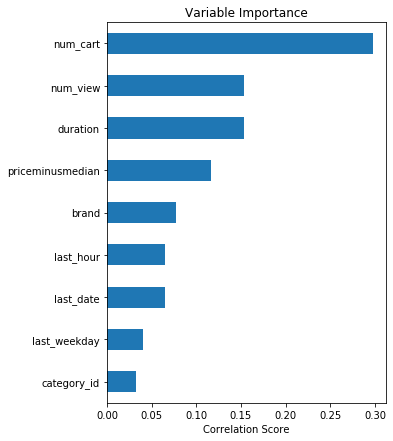

In [113]:
# plot variable importance
plt.figure(figsize=(5,7))
var_importance = (pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh'))
plt.title("Variable Importance")
plt.xlabel("Correlation Score")
plt.show()

### GBM

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('gbm', gbm)])
n_estimators = [5, 10, 50, 100, 200]
max_depth = [3, 5, 7, 9, 11, 13, 15]

parameters = dict(gbm__max_depth=max_depth, 
                  gbm__n_estimators=n_estimators)

gbm_GS = GridSearchCV(pipe, parameters, scoring='f1')
gbm_GS.fit(X_train, y_train)

print(gbm_GS.best_estimator_.get_params()['gbm'])
best_nestimators = gbm_GS.best_estimator_.get_params()['gbm__n_estimators']
best_maxdepth = gbm_GS.best_estimator_.get_params()['gbm__max_depth']

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [115]:
gbm_model = GradientBoostingClassifier(n_estimators = best_nestimators, max_depth = best_maxdepth, random_state = 123)

# set up model
name = "GBM"
gbm_model.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(gbm_model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(gbm_model.score(X_test, y_test)))
model_pred = gbm_model.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[GBM]

Accuracy of classifier on training set: 0.99
Accuracy of classifier on test set: 0.98
------------------------------------------------------------

Predicted     0   1
Actual             
0          4849  26
1            87  38
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4875
           1       0.59      0.30      0.40       125

    accuracy                           0.98      5000
   macro avg       0.79      0.65      0.70      5000
weighted avg       0.97      0.98      0.97      5000



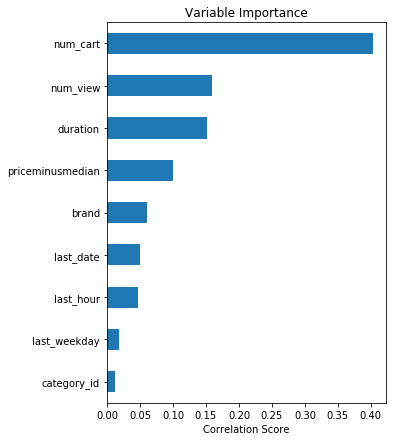

In [116]:
# plot variable importance
plt.figure(figsize=(5,7))
var_importance = (pd.Series(gbm_model.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh'))
plt.title("Variable Importance")
plt.xlabel("Correlation Score")
plt.show()

### Neural Net

In [79]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

# set up pipeline and gridsearch
pipe = Pipeline(steps=[('nn', nn)])
hidden_layer_sizes = [(50,50,50), (50,100,50), (100,)]
activation = ['tanh', 'relu']
alpha = [0.0001, 0.05]

parameters = dict(nn__hidden_layer_sizes = hidden_layer_sizes, 
                  nn__activation = activation,
                  nn__alpha = alpha)

nn_GS = GridSearchCV(pipe, parameters, scoring='f1')
nn_GS.fit(X_train, y_train)

print(nn_GS.best_estimator_.get_params()['nn'])
best_hidden_layer_sizes = nn_GS.best_estimator_.get_params()['nn__hidden_layer_sizes']
best_activation = nn_GS.best_estimator_.get_params()['nn__activation']
best_alpha = nn_GS.best_estimator_.get_params()['nn__alpha']

MLPClassifier(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [80]:
nn_model = MLPClassifier(hidden_layer_sizes = best_hidden_layer_sizes,
                         activation = best_activation,
                         alpha = best_alpha,
                         random_state = 123)

# set up model
name = "Neural Net"
nn_model.fit(X_train, y_train)

# print results
print('\n[' + name + ']')
print('\nAccuracy of classifier on training set: {:.2f}'
        .format(nn_model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
        .format(nn_model.score(X_test, y_test)))
model_pred = nn_model.predict(X_test)
print("-"*60)
print()
print(pd.crosstab(y_test, model_pred, rownames=['Actual'], colnames=['Predicted']))
print("-"*60)
print()
print(classification_report(y_test, model_pred))


[Neural Net]

Accuracy of classifier on training set: 0.98
Accuracy of classifier on test set: 0.97
------------------------------------------------------------

Predicted     0   1
Actual             
0          4858  17
1           109  16
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4875
           1       0.48      0.13      0.20       125

    accuracy                           0.97      5000
   macro avg       0.73      0.56      0.59      5000
weighted avg       0.97      0.97      0.97      5000



### AU-ROC Scores and ROC Curves

No Skill (AU-ROC) = 0.500
Decision Tree (AU-ROC) = 0.915
Logistic Regression (AU-ROC) = 0.892
Gaussian Naive Bayes (AU-ROC) = 0.845
K-NN (AU-ROC) = 0.847
SVM (AU-ROC) = 0.657
Random Forest (AU-ROC) = 0.935
Gradient Boosting (AU-ROC) = 0.943
Neural Net (AU-ROC) = 0.908


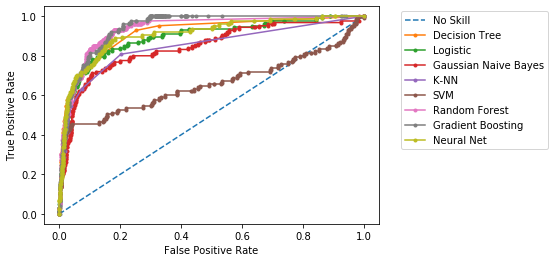

In [81]:
ns_probs = [0 for _ in range(len(y_test))]
dt_probs = dtree.predict_proba(X_test)
lr_probs = logreg.predict_proba(X_test)
gnb_probs = gnb.predict_proba(X_test)
knn_probs = knn_model.predict_proba(X_test)
svm_probs = svm_model.predict_proba(X_test)
rf_probs = rf_model.predict_proba(X_test)
gbm_probs = gbm_model.predict_proba(X_test)
nn_probs = nn_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]
lr_probs = lr_probs[:, 1]
gnb_probs = gnb_probs[:, 1]
knn_probs = knn_probs[:, 1]
svm_probs = svm_probs[:, 1]
rf_probs = rf_probs[:, 1]
gbm_probs = gbm_probs[:, 1]
nn_probs = nn_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gbm_auc = roc_auc_score(y_test, gbm_probs)
nn_auc = roc_auc_score(y_test, nn_probs)

# summarize scores
print('No Skill (AU-ROC) = %.3f' % (ns_auc))
print('Decision Tree (AU-ROC) = %.3f' % (dt_auc))
print('Logistic Regression (AU-ROC) = %.3f' % (lr_auc))
print('Gaussian Naive Bayes (AU-ROC) = %.3f' % (gnb_auc))
print('K-NN (AU-ROC) = %.3f' % (knn_auc))
print('SVM (AU-ROC) = %.3f' % (svm_auc))
print('Random Forest (AU-ROC) = %.3f' % (rf_auc))
print('Gradient Boosting (AU-ROC) = %.3f' % (gbm_auc))
print('Neural Net (AU-ROC) = %.3f' % (nn_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gbm_fpr, gbm_tpr, _ = roc_curve(y_test, gbm_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='K-NN')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.plot(gbm_fpr, gbm_tpr, marker='.', label='Gradient Boosting')
pyplot.plot(nn_fpr, nn_tpr, marker='.', label='Neural Net')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# show the plot
pyplot.show()